# PIMA Indians Diabetes Classifier

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Importing the required libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [82]:
pima_df = pd.read_csv("diabetes1.csv")

In [83]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    pima_df[col].replace(0, np.nan, inplace=True)
    pima_df[col].fillna(pima_df[col].mean(), inplace=True)  # or median


In [84]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [85]:
pima_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


In [86]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [87]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [88]:
pima_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Exploratory Data Analysis (EDA)

Text(0, 0.5, 'Count')

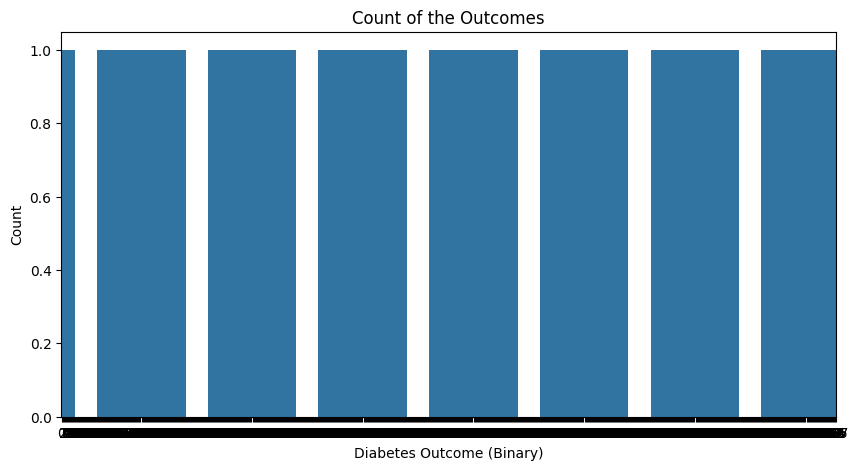

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(pima_df['Outcome'])
plt.title("Count of the Outcomes")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

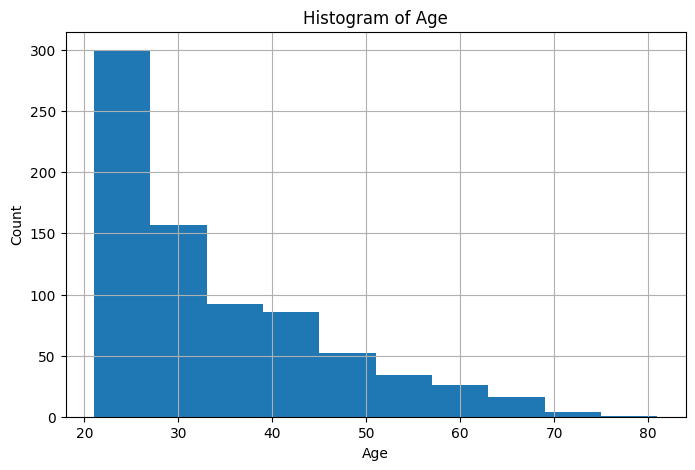

In [90]:
plt.figure(figsize=(8,5))
pima_df['Age'].hist()
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Pregnancy')

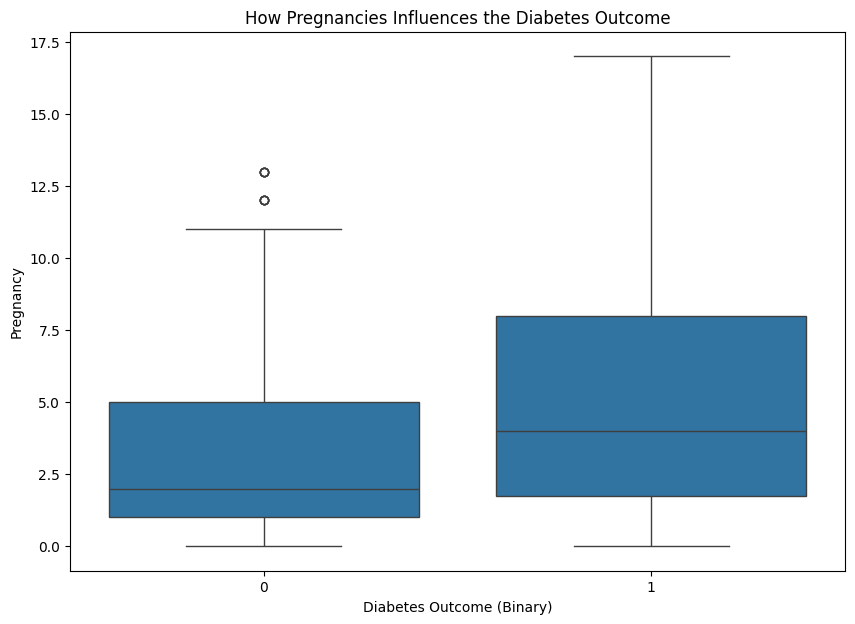

In [91]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome', y='Pregnancies', data=pima_df)
plt.title("How Pregnancies Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("Pregnancy")

Text(0, 0.5, 'Glucose')

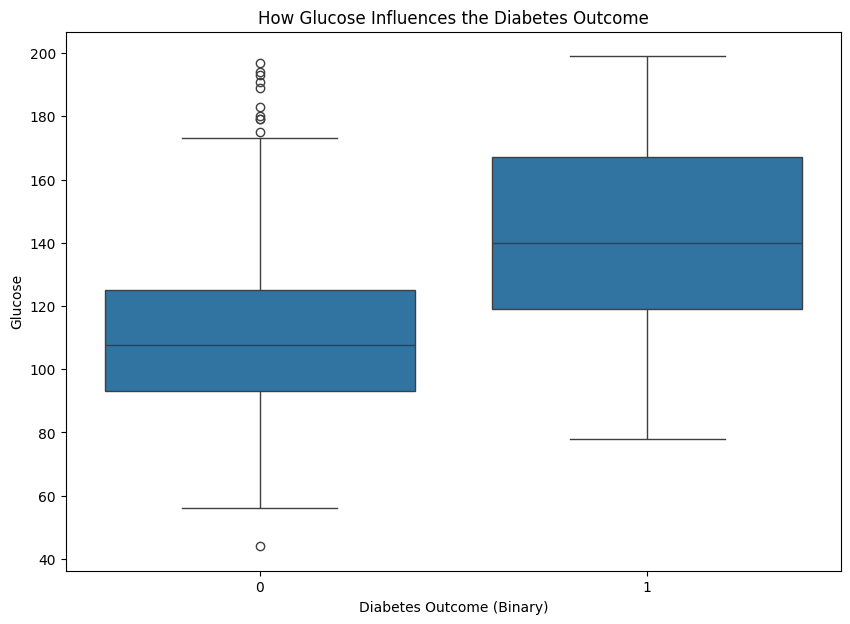

In [92]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome", y="Glucose", data= pima_df)
plt.title("How Glucose Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("Glucose")

Text(0, 0.5, 'BP')

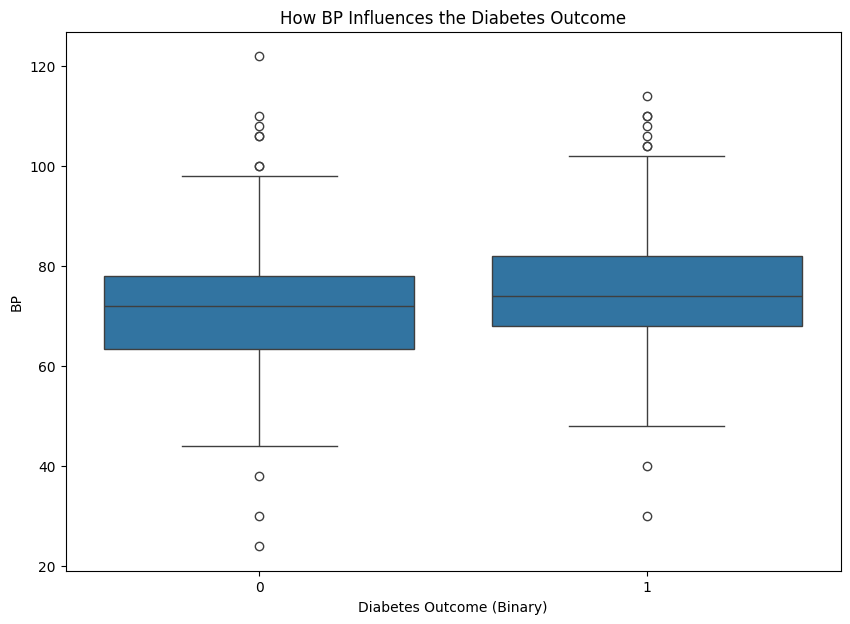

In [93]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome", y="BloodPressure", data= pima_df)
plt.title("How BP Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("BP")

Text(0, 0.5, 'Skin Thickness')

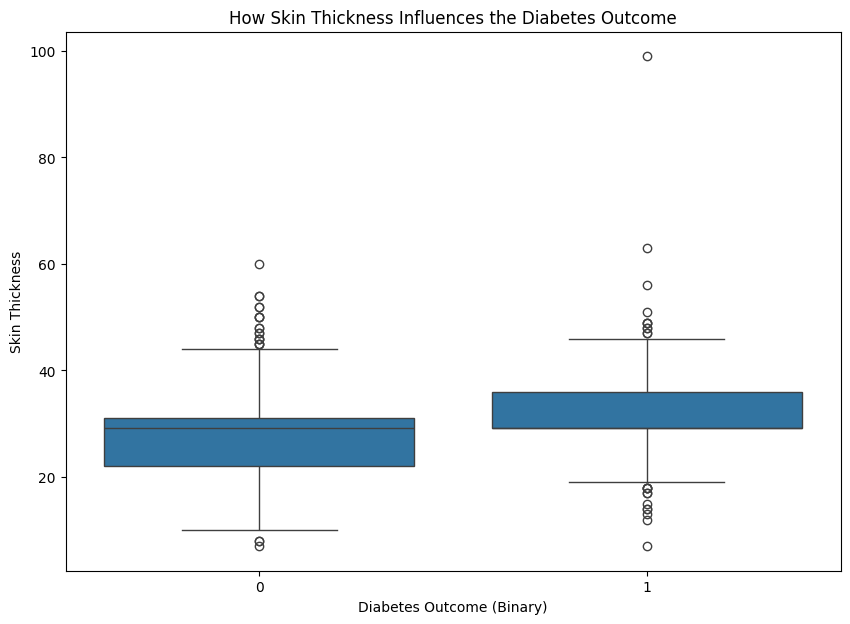

In [94]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome", y="SkinThickness", data= pima_df)
plt.title("How Skin Thickness Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("Skin Thickness")

Text(0, 0.5, 'Insulin')

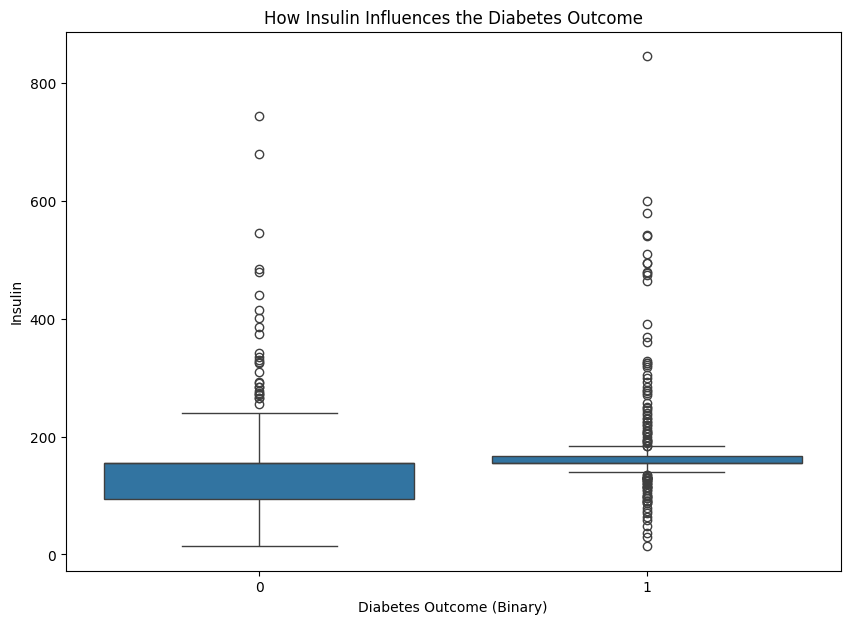

In [95]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome", y="Insulin", data= pima_df)
plt.title("How Insulin Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("Insulin")

Text(0, 0.5, 'BMI')

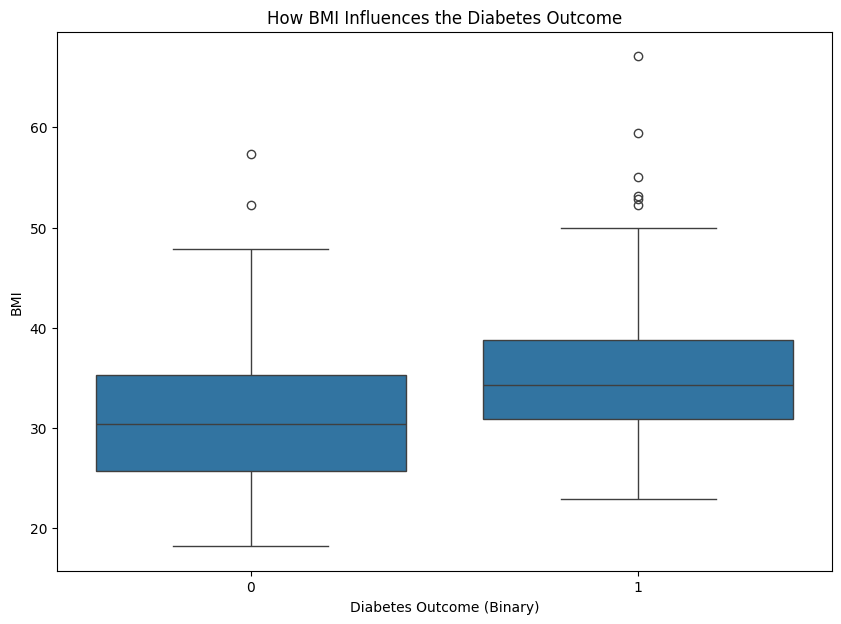

In [96]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome", y="BMI", data= pima_df)
plt.title("How BMI Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("BMI")

Text(0, 0.5, 'Diabetes Pedigree Function')

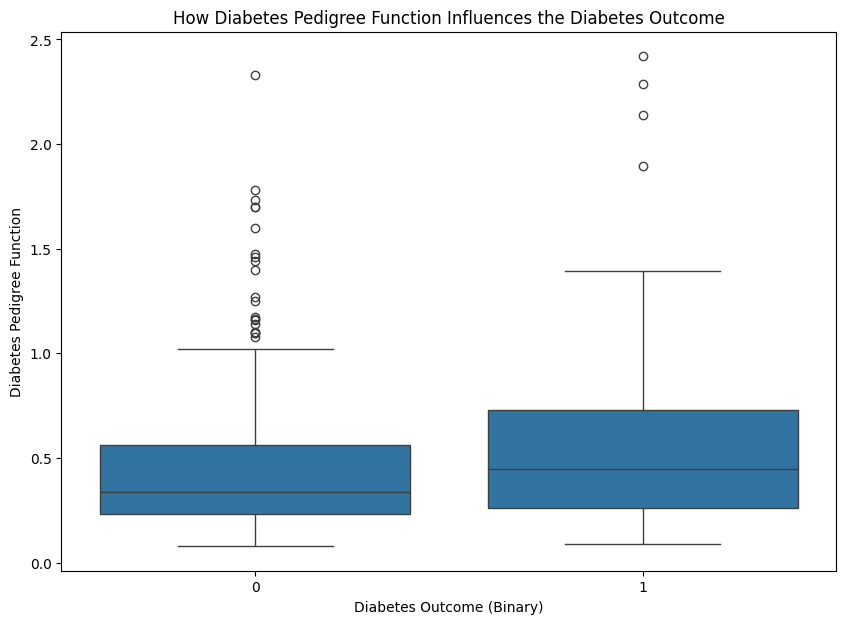

In [97]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data= pima_df)
plt.title("How Diabetes Pedigree Function Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("Diabetes Pedigree Function")

Text(0, 0.5, 'Age')

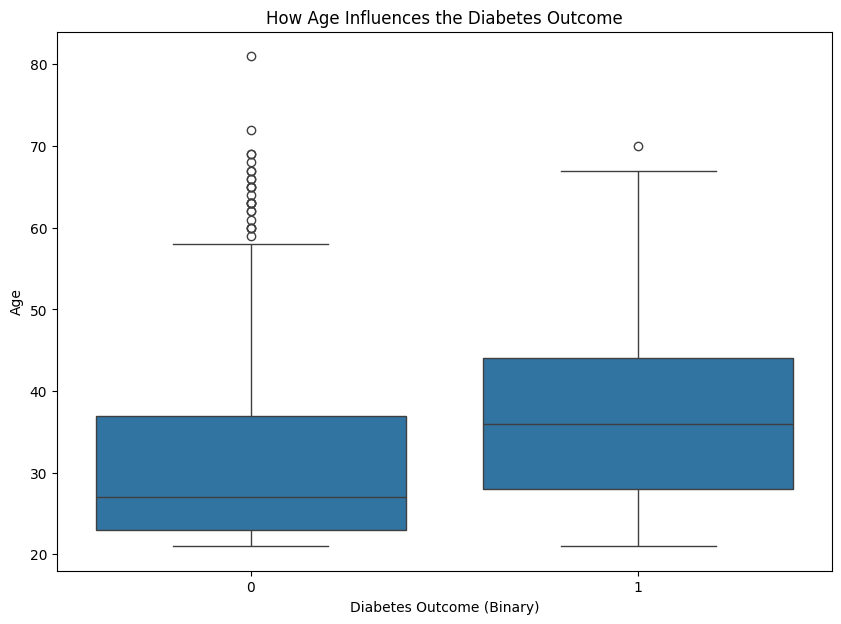

In [98]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Outcome", y="Age", data= pima_df)
plt.title("How Age Influences the Diabetes Outcome")
plt.xlabel("Diabetes Outcome (Binary)")
plt.ylabel("Age")

Text(0, 0.5, 'Glucose')

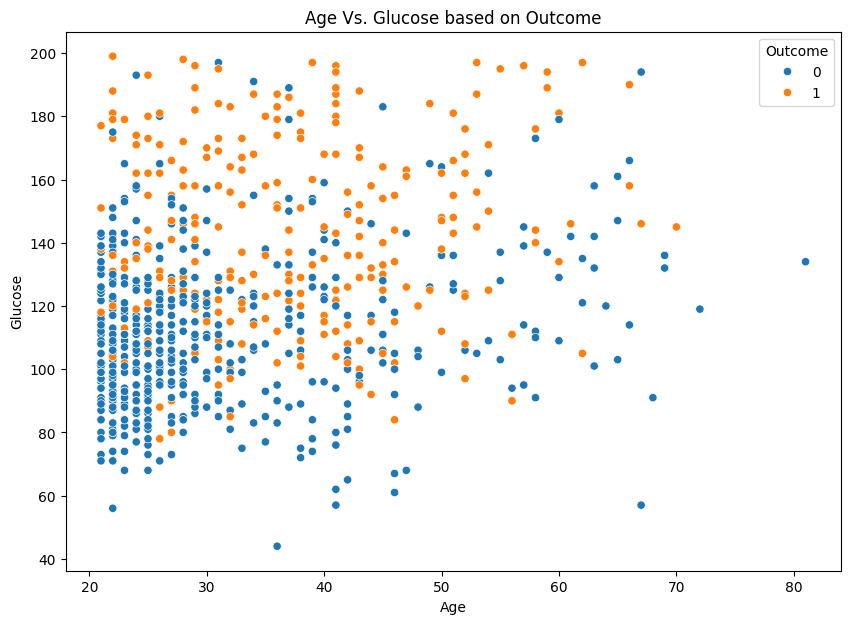

In [99]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data= pima_df)
plt.title("Age Vs. Glucose based on Outcome")
plt.xlabel("Age")
plt.ylabel("Glucose")

Text(0, 0.5, 'BP')

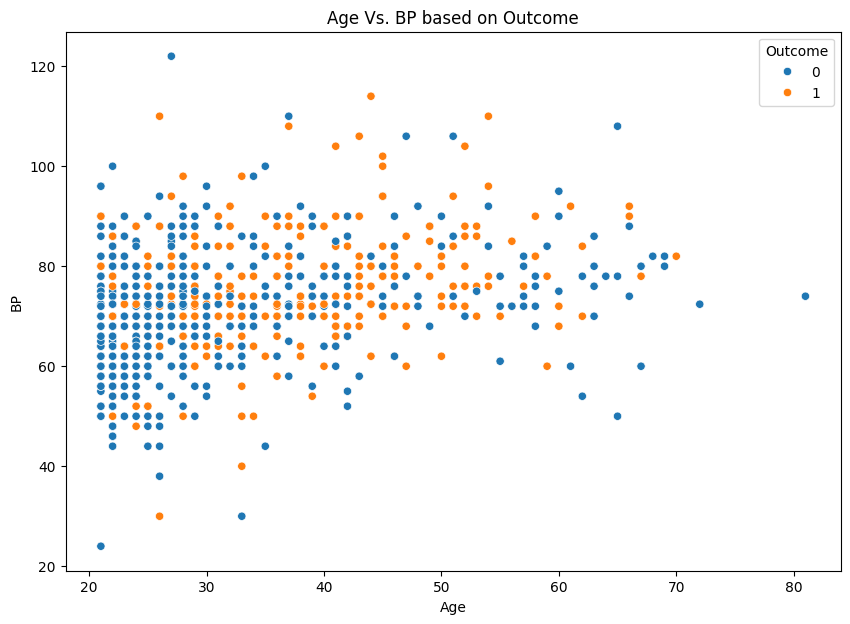

In [100]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="BloodPressure", hue="Outcome", data= pima_df)
plt.title("Age Vs. BP based on Outcome")
plt.xlabel("Age")
plt.ylabel("BP")

Text(0, 0.5, 'Skin Thickness')

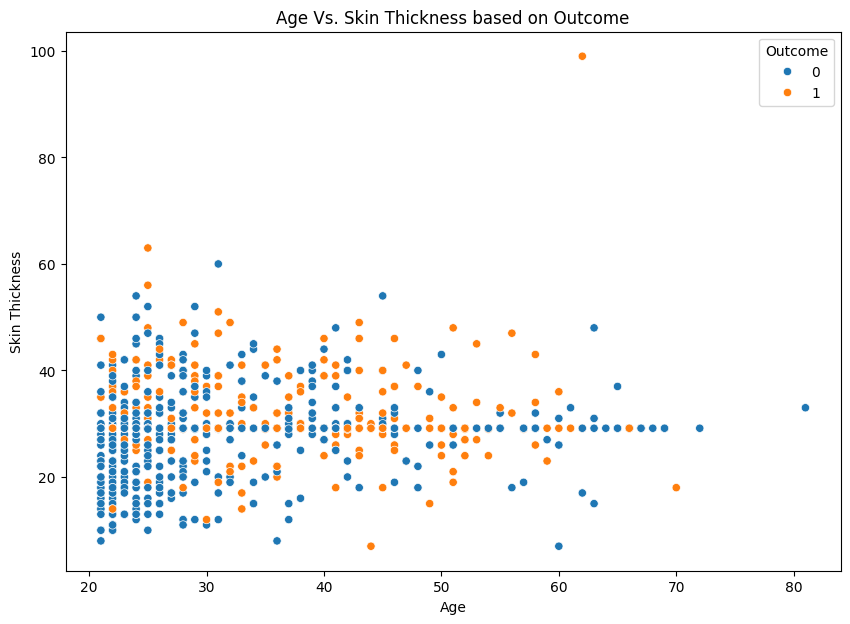

In [101]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="SkinThickness", hue="Outcome", data= pima_df)
plt.title("Age Vs. Skin Thickness based on Outcome")
plt.xlabel("Age")
plt.ylabel("Skin Thickness")

Text(0, 0.5, 'Insulin')

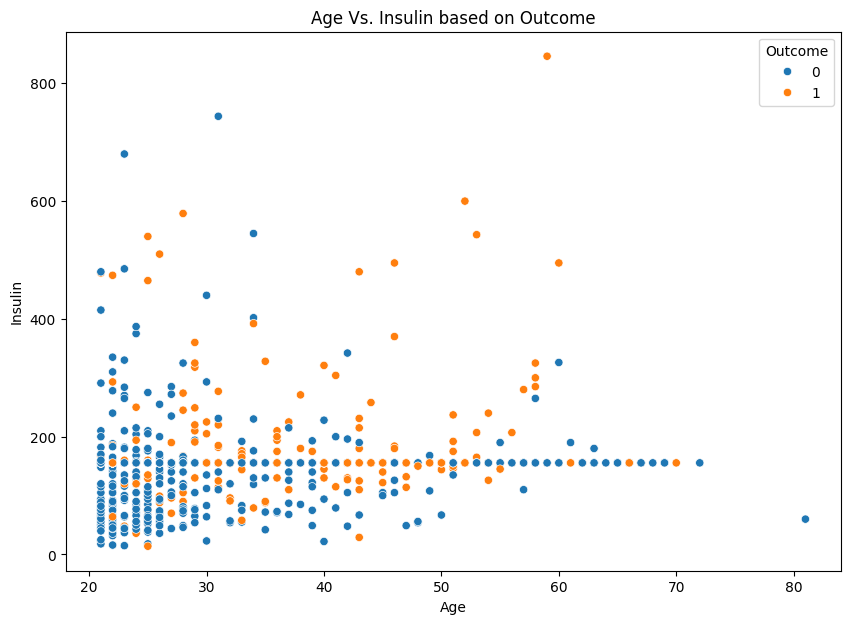

In [102]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="Insulin", hue="Outcome", data= pima_df)
plt.title("Age Vs. Insulin based on Outcome")
plt.xlabel("Age")
plt.ylabel("Insulin")

Text(0, 0.5, 'BMI')

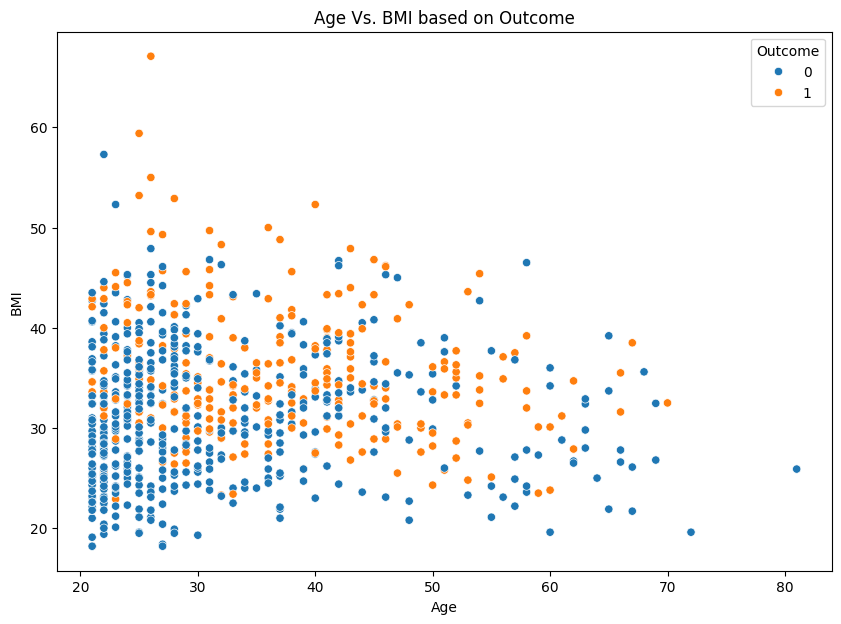

In [103]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="BMI", hue="Outcome", data= pima_df)
plt.title("Age Vs. BMI based on Outcome")
plt.xlabel("Age")
plt.ylabel("BMI")

Text(0, 0.5, 'Diabetes Pedigree Function')

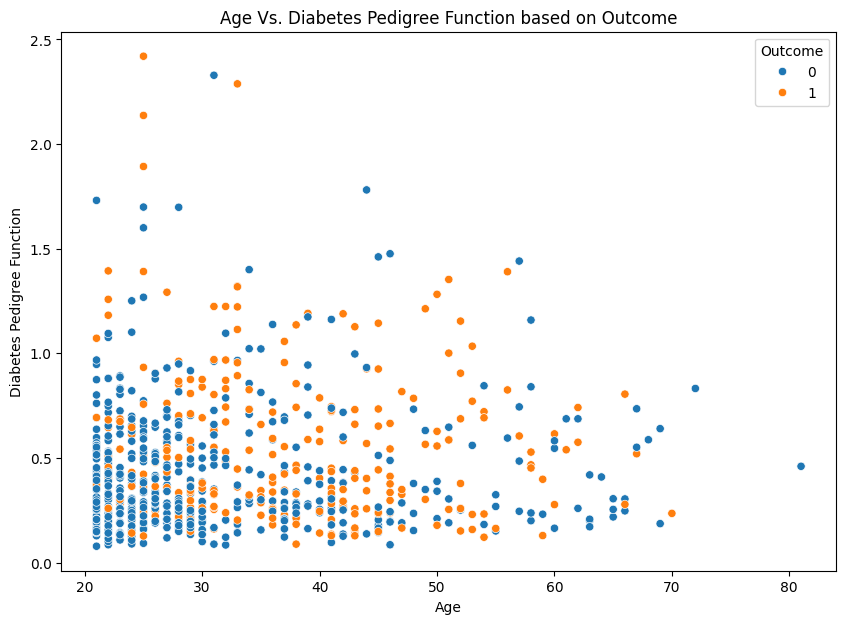

In [104]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="DiabetesPedigreeFunction", hue="Outcome", data= pima_df)
plt.title("Age Vs. Diabetes Pedigree Function based on Outcome")
plt.xlabel("Age")
plt.ylabel("Diabetes Pedigree Function")

Text(0.5, 1.0, 'Correlation Heatmap')

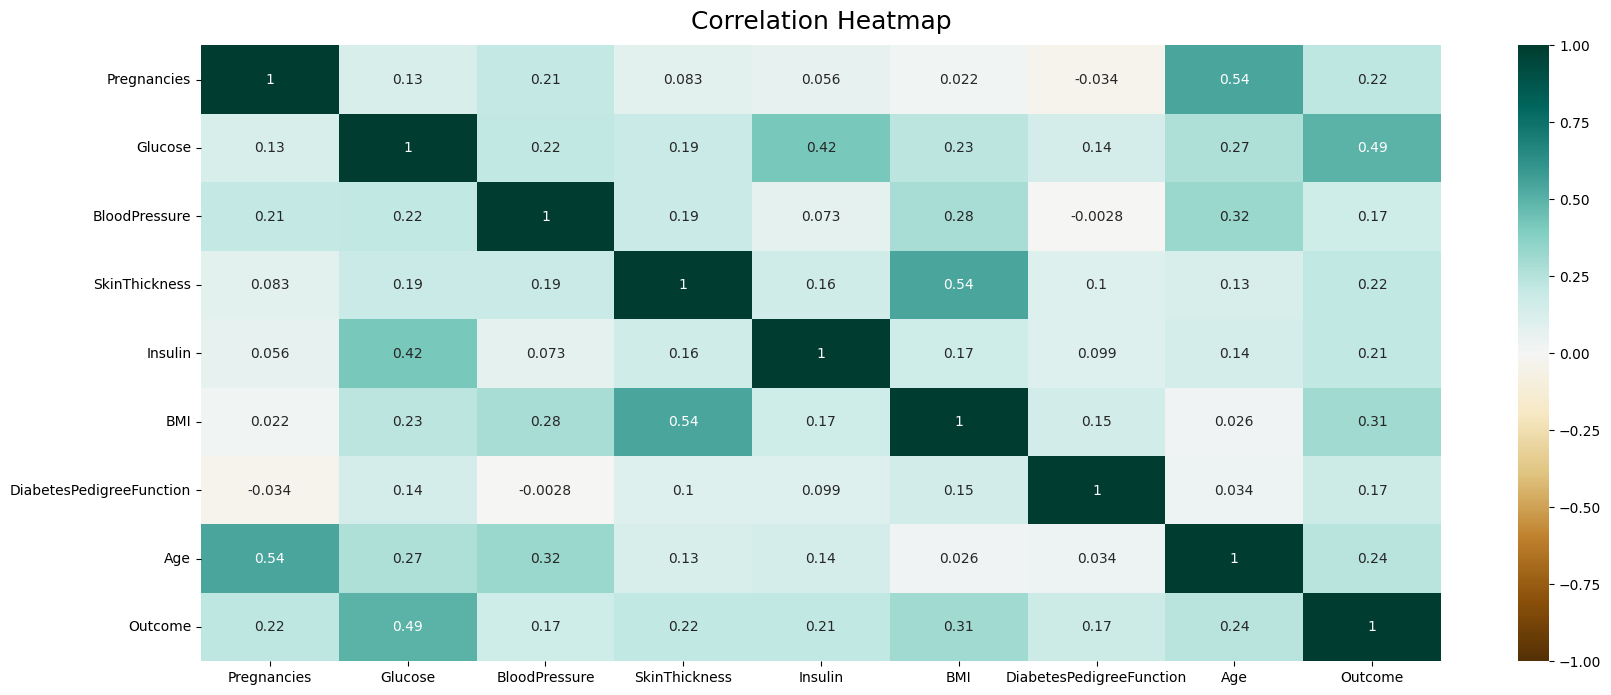

In [105]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(pima_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

<Figure size 2000x1500 with 0 Axes>

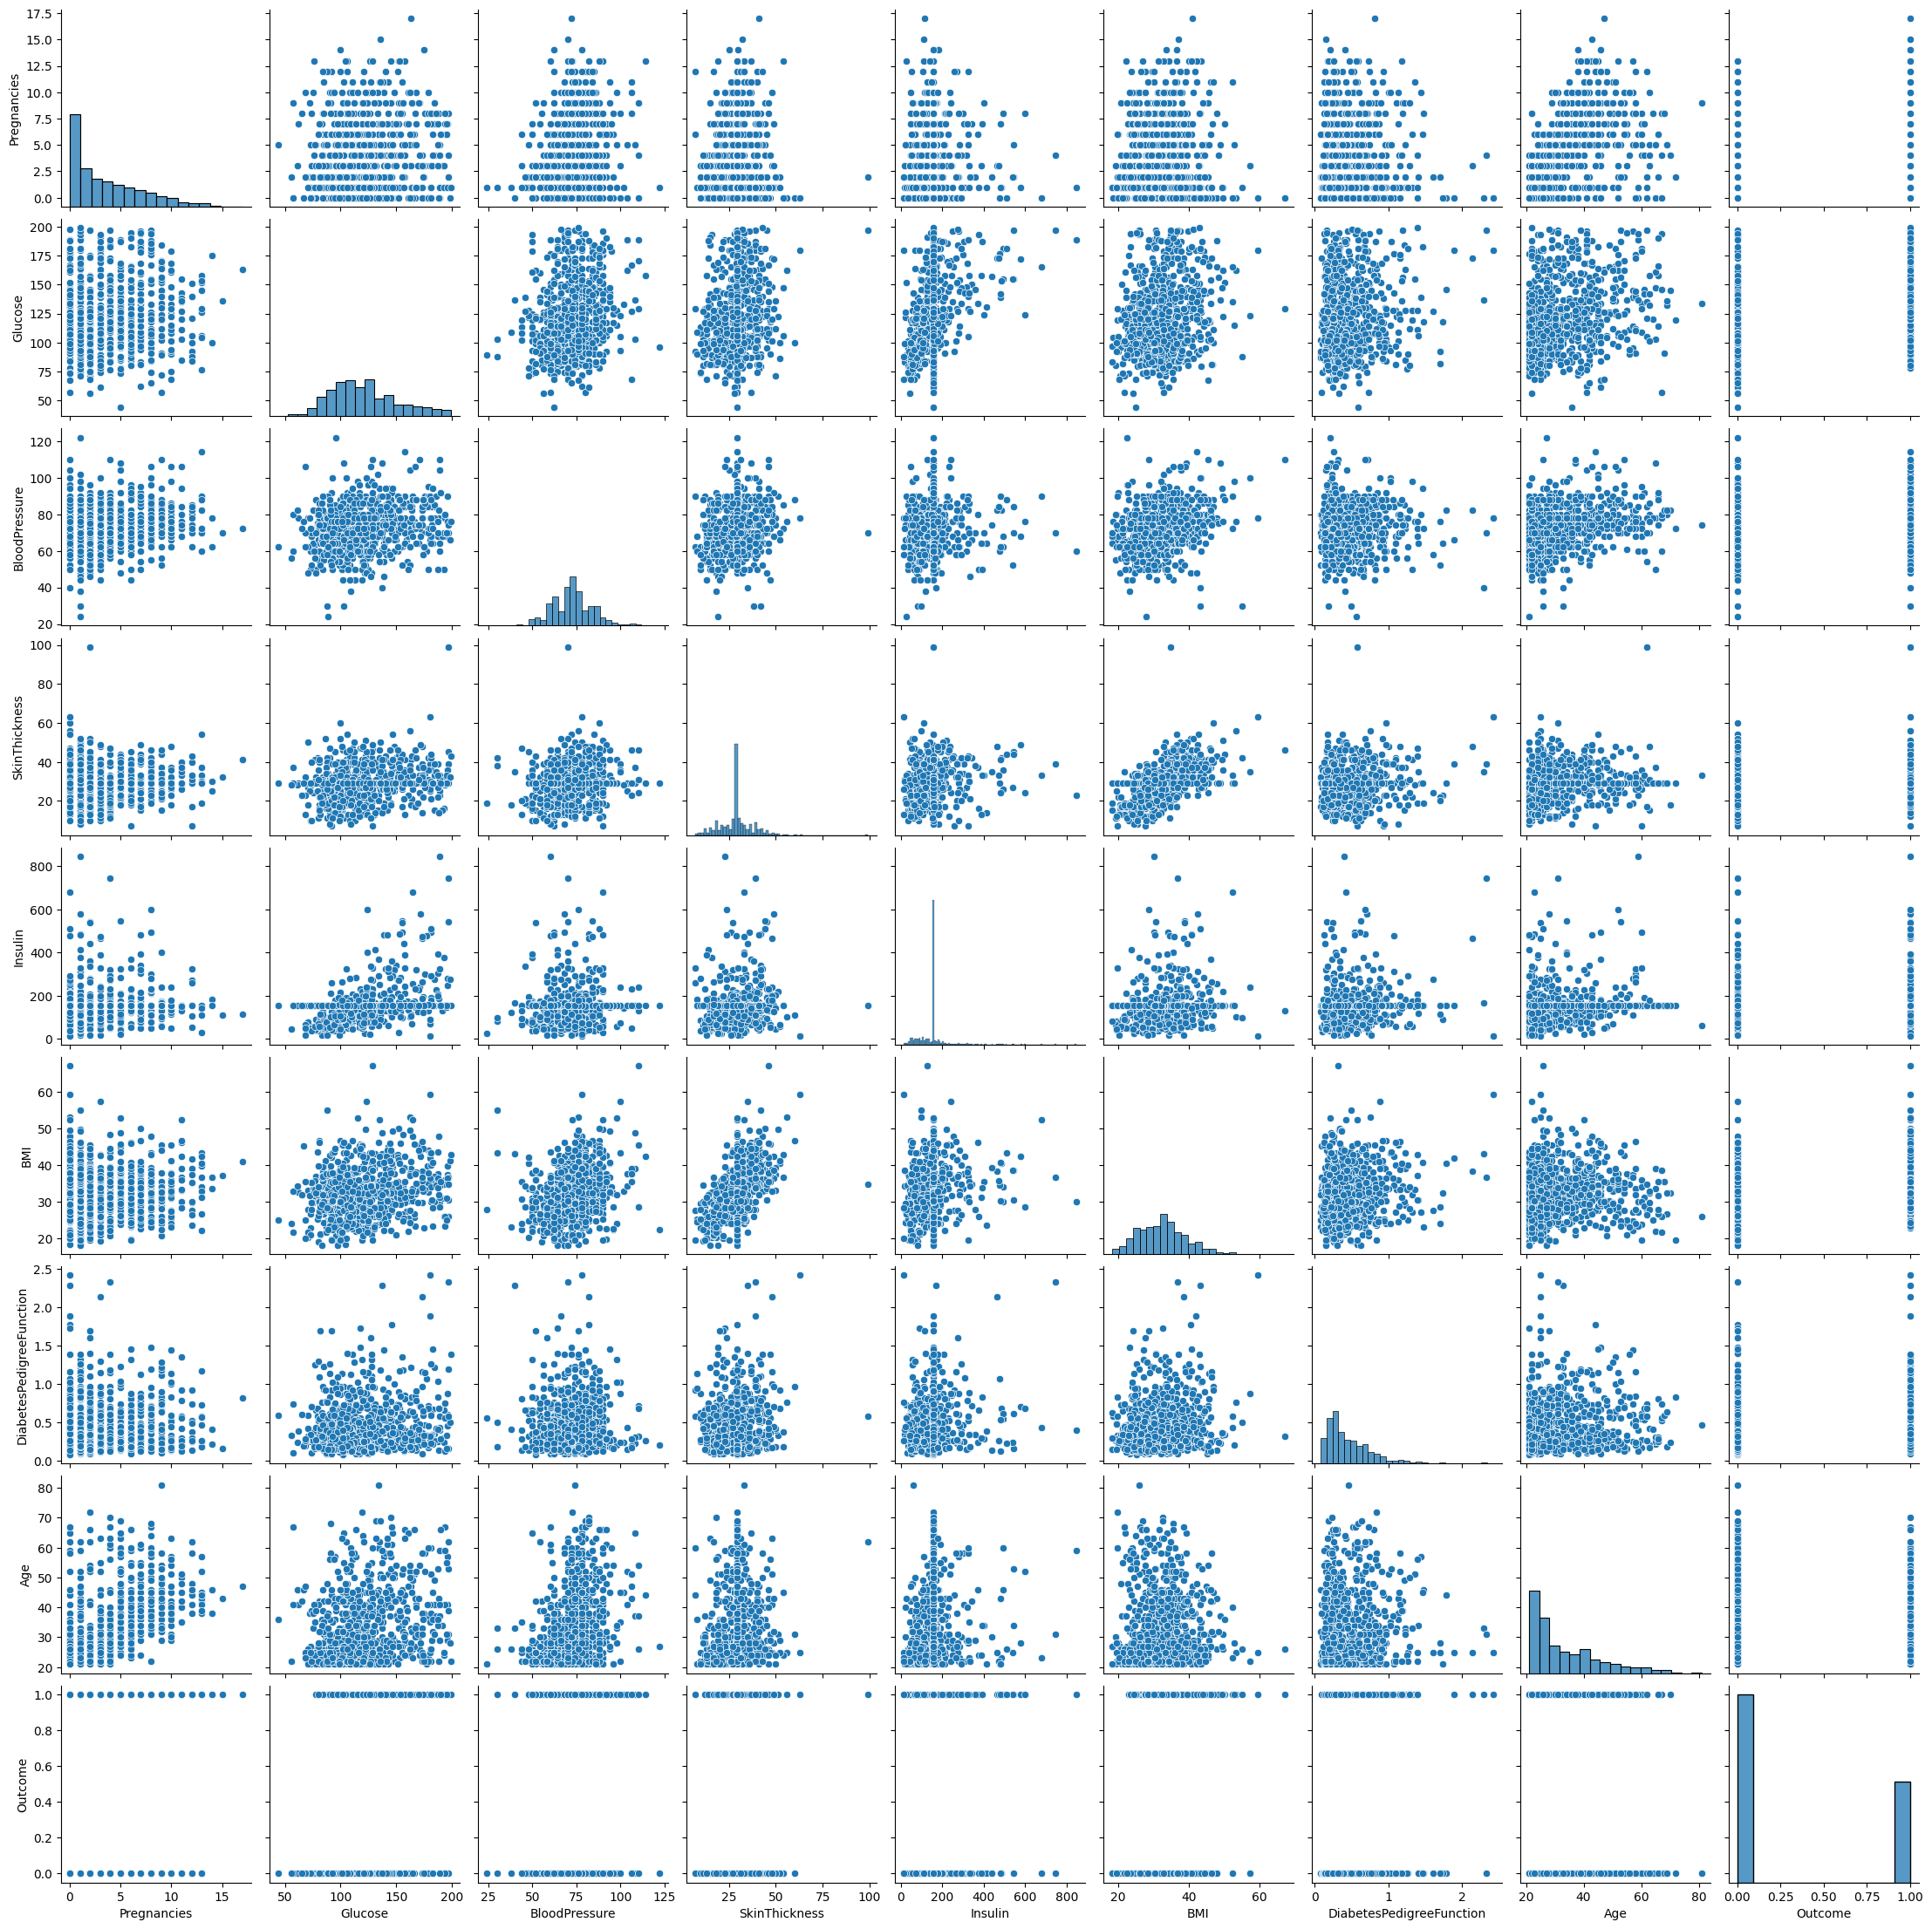

In [106]:
plt.figure(figsize=(20,15))
sns.pairplot(pima_df)

### Partitioning the data set

In [107]:
X = pima_df.drop('Outcome', axis=1)
y = pima_df['Outcome']

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)


In [114]:
print(X.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [115]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

## Building Machine Learning Models (Primary Metric = Accuracy)

In [116]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score

In [117]:
rfc = RandomForestClassifier(n_estimators=1000)
XGB = xgb.XGBClassifier()
grad = GradientBoostingClassifier()

### Random Forest Classifier

In [118]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [119]:
preds_rfc = rfc.predict(X_test)

In [120]:
print("Accuracy of the Random Forest model: ", accuracy_score(y_test, preds_rfc))

Accuracy of the Random Forest model:  0.7878787878787878


### XGBoost Classifier

In [121]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [122]:
preds_XGB = XGB.predict(X_test)

In [123]:
print("Accuracy of the XGB model: ", accuracy_score(y_test, preds_XGB))

Accuracy of the XGB model:  0.7532467532467533


### GradientBoosting Classifier

In [124]:
grad.fit(X_train, y_train)

GradientBoostingClassifier()

In [125]:
preds_grad = grad.predict(X_test)

In [126]:
print("Accuracy of the Gradient Classifier model: ", accuracy_score(y_test, preds_grad))

Accuracy of the Gradient Classifier model:  0.7445887445887446


## Evaluating the trained models

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

### Evaluating Random Forest Classifier

In [128]:
print("Random Forest Classifier's Evalution Report: ")
print('\n')
print(classification_report(y_test, preds_rfc))

Random Forest Classifier's Evalution Report: 


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       160
           1       0.64      0.70      0.67        71

    accuracy                           0.79       231
   macro avg       0.75      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231



In [129]:
print(confusion_matrix(y_test, preds_rfc))

[[132  28]
 [ 21  50]]


### Evaluating XGBoost Classifier

In [130]:
print("XGBoost Classifier's Evalution Report: ")
print('\n')
print(classification_report(y_test, preds_XGB))

XGBoost Classifier's Evalution Report: 


              precision    recall  f1-score   support

           0       0.85      0.78      0.81       160
           1       0.58      0.69      0.63        71

    accuracy                           0.75       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.77      0.75      0.76       231



In [131]:
print(confusion_matrix(y_test, preds_XGB))

[[125  35]
 [ 22  49]]


### Evaluating GradientBoost Classifier

In [132]:
print("GradientBoost Classifier's Evalution Report: ")
print('\n')
print(classification_report(y_test, preds_grad))

GradientBoost Classifier's Evalution Report: 


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       160
           1       0.57      0.65      0.61        71

    accuracy                           0.74       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.75      0.74      0.75       231



In [133]:
print(confusion_matrix(y_test, preds_grad))

[[126  34]
 [ 25  46]]


## HyperTuning the trained models

### Hyper-Tuning the XGBoost Classifier Model

In [134]:
from sklearn.model_selection import RandomizedSearchCV

In [135]:
XGB_params = {
          "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
          "min_child_weight" : [ 1, 3, 5, 7 ],
          "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
          "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
       }

In [136]:
random_search = RandomizedSearchCV(XGB , param_distributions= XGB_params , n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

In [137]:
random_search.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [138]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [139]:
print(random_search.best_params_)

{'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.7}


#### Training a Hyper-Tuned XGBoost Classifier Model

In [140]:
xgb_Classifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=np.nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [141]:
xgb_Classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=12, max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, ...)

In [142]:
preds_HypXGB = xgb_Classifier.predict(X_test)

In [143]:
print("Evaluating the hyper-tuned XGBoost Classifier Model: ")
print("\n")
print("Accuracy of the Hyper-Tuned XGBoost Classifier model is ", accuracy_score(y_test, preds_HypXGB))
print("\n")
print(classification_report(y_test, preds_HypXGB))
print("\n")
print(confusion_matrix(y_test, preds_HypXGB))

Evaluating the hyper-tuned XGBoost Classifier Model: 


Accuracy of the Hyper-Tuned XGBoost Classifier model is  0.7619047619047619


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       160
           1       0.60      0.69      0.64        71

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.77      0.76      0.77       231



[[127  33]
 [ 22  49]]


### Hyper-Tuning the Gradient Boost Classifier Model

In [144]:
GradientBooster_params = {"n_estimators" : [100,500,1000],
               "subsample" : [0.6,0.8,1.0],
               "max_depth" : [5,10,15,20,25,30],
               "learning_rate" : [0.1, 0.01, 0.02, 0.5]
               }

In [145]:
random_search_GradBoost = RandomizedSearchCV( grad , param_distributions= GradientBooster_params , n_iter=5, scoring='accuracy', n_jobs=-1, cv=5, verbose=3)

In [146]:
random_search_GradBoost.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.02, 0.5],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=3)

In [147]:
print(random_search_GradBoost.best_estimator_)

GradientBoostingClassifier(learning_rate=0.02, max_depth=5, subsample=0.6)


In [148]:
print(random_search_GradBoost.best_params_)

{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.02}


#### Training a Hyper-Tuned GradientBoost Classifier Model

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

grad_Classifier = GradientBoostingClassifier(
    learning_rate=0.01,
    n_estimators=500,
    max_depth=10,
    subsample=0.6,
    random_state=None
)


In [150]:
grad_Classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=500,
                           subsample=0.6)

In [151]:
preds_HypGrad = grad_Classifier.predict(X_test)

In [152]:
print("Evaluating the hyper-tuned Gradient Classifier Model: ")
print("\n")
print("Accuracy of the Hyper-Tuned Gradient Classifier model is ", accuracy_score(y_test, preds_HypGrad))
print("\n")
print(classification_report(y_test, preds_HypGrad))
print("\n")
print(confusion_matrix(y_test, preds_HypGrad))

Evaluating the hyper-tuned Gradient Classifier Model: 


Accuracy of the Hyper-Tuned Gradient Classifier model is  0.7748917748917749


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       160
           1       0.62      0.69      0.65        71

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.78      0.77      0.78       231



[[130  30]
 [ 22  49]]


## Cross-Validating the Hyper-Tuned Models

### Cross Validating the XGBoost Classifier Model

In [153]:
from sklearn.model_selection import cross_val_score

In [154]:
XGB_Score = cross_val_score(xgb_Classifier, X, y, cv= 5)

In [155]:
print("Cross Validation Report of the XGBoost Classifier Model: ")
print("\n")
print(XGB_Score)

Cross Validation Report of the XGBoost Classifier Model: 


[0.74025974 0.71428571 0.74675325 0.77124183 0.75816993]


In [156]:
print("Average Cross Validation Report of the XGBoost Classifier Model: ", XGB_Score.mean())

Average Cross Validation Report of the XGBoost Classifier Model:  0.7461420932009167


### Cross Validating the Gradient Boost Classifier Model|

In [157]:
GradBoost_Score = cross_val_score(grad_Classifier, X, y, cv=5)

In [158]:
print("Cross Validation Report of the GradientBoost Classifier Model: ")
print("\n")
print(GradBoost_Score)

Cross Validation Report of the GradientBoost Classifier Model: 


[0.74675325 0.73376623 0.74675325 0.83006536 0.73202614]


In [159]:
print("Average Cross Validation Report of the GradientBoost Classifier Model: ", GradBoost_Score.mean())

Average Cross Validation Report of the GradientBoost Classifier Model:  0.7578728461081402


## Saving the Best Model

In [160]:
from joblib import dump
MODEL_NAME = "Diabetes_Model1.pkl"
dump(grad_Classifier, MODEL_NAME) 

['Diabetes_Model1.pkl']

In [161]:
from joblib import dump

dump(scaler, "scaler.pkl")


['scaler.pkl']